In [1]:
import graphlab

## Load some house value vs crime rate data
Dataset is from Philly, PA and includes average house sales price in a number of neighborhoods.  The attributes of each neighbrorhood we have include the crime rate ('CrimeRate'), miles from the Center City ('MilesPhila'), town name ('Name') and county name ('County')

In [2]:
sales = graphlab.SFrame.read_csv('Philadelphia_Crime_Rate_noNA.csv')

This non-commercial license of GraphLab Create is assigned to todd.farr@gmail.com and will expire on March 15, 2017. For commercial licensing options, visit https://dato.com/buy/.


2016-04-09 17:02:21,196 [INFO] graphlab.cython.cy_server, 176: GraphLab Create v1.8.5 started. Logging: C:\Users\TODDFA~1\AppData\Local\Temp\graphlab_server_1460188939.log.0


Finished parsing file F:\Coursera\coursera_ml_regresssion\week_1\Philadelphia_Crime_Rate_noNA.csv

Parsing completed. Parsed 99 lines in 0.015005 secs.

------------------------------------------------------
Inferred types from first line of file as 
column_type_hints=[long,float,float,float,float,str,str]
If parsing fails due to incorrect types, you can correct
the inferred type list above and pass it to read_csv in
the column_type_hints argument
------------------------------------------------------


Finished parsing file F:\Coursera\coursera_ml_regresssion\week_1\Philadelphia_Crime_Rate_noNA.csv

Parsing completed. Parsed 99 lines in 0.014041 secs.

In [3]:
sales.head()

HousePrice,"HsPrc ($10,000)",CrimeRate,MilesPhila,PopChg,Name,County
140463,14.0463,29.7,10.0,-1.0,Abington,Montgome
113033,11.3033,24.1,18.0,4.0,Ambler,Montgome
124186,12.4186,19.5,25.0,8.0,Aston,Delaware
110490,11.049,49.4,25.0,2.7,Bensalem,Bucks
79124,7.9124,54.1,19.0,3.9,Bristol B.,Bucks
92634,9.2634,48.6,20.0,0.6,Bristol T.,Bucks
89246,8.9246,30.8,15.0,-2.6,Brookhaven,Delaware
195145,19.5145,10.8,20.0,-3.5,Bryn Athyn,Montgome
297342,29.7342,20.2,14.0,0.6,Bryn Mawr,Montgome
264298,26.4298,20.4,26.0,6.0,Buckingham,Bucks


## Exploring the data

In [4]:
graphlab.canvas.set_target('ipynb')
sales.show(view='Scatter Plot', x='CrimeRate', y='HousePrice')

## Fit the regression model using crime as the feature

In [5]:
crime_model = graphlab.linear_regression.create(sales,
                                               target='HousePrice',
                                               features=['CrimeRate'],
                                               validation_set=None,
                                               verbose=False)

## Let's see what our fit looks like 

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

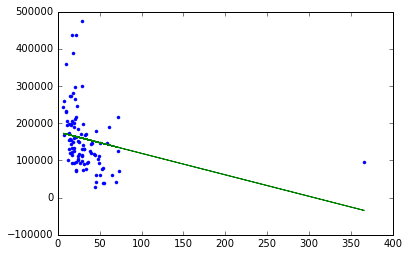

In [7]:
plt.plot(sales['CrimeRate'], sales['HousePrice'], '.',
        sales['CrimeRate'], crime_model.predict(sales), '-')

## Remove Center City and redo the analysis

Center city is the one observation with an extremely high crime rate yet the house prices aren't that low.  This point does not follow the rest of the data that well.

In [8]:
sales_noCC = sales[sales['MilesPhila'] != 0.0]

In [9]:
sales_noCC.show(view='Scatter Plot', x='CrimeRate', y='HousePrice')

### Refit our simple regression model on this modified dataset.

In [11]:
crime_model_noCC = graphlab.linear_regression.create(sales_noCC,
                                                   target='HousePrice', 
                                                   features=['CrimeRate'],
                                                   validation_set=None,
                                                   verbose=False)

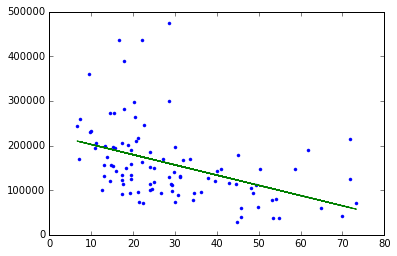

In [13]:
plt.plot(sales_noCC['CrimeRate'], sales_noCC['HousePrice'], '.',
        sales_noCC['CrimeRate'], crime_model_noCC.predict(sales_noCC), '-')

## Compare coefficients for full-data vs no_CC fit

In [15]:
crime_model.get('coefficients')

name,index,value,stderr
(intercept),None,176626.046881,11245.5882194
CrimeRate,None,-576.804949058,226.90225951


In [16]:
crime_model_noCC.get('coefficients')

name,index,value,stderr
(intercept),None,225204.604303,16404.0247514
CrimeRate,None,-2287.69717443,491.537478123


Above: we see that for the "no City center" version, per unit increase in crime, the predicted decrease in house prices is 2,287.  In contrast, for the original dataset, the drop is only 576 per unit increase in crime.  This is significantly different 

#### High Leverage Points 

Center City is said to be 'high leverage' point because it is at an extreme x value where there are not other observations.  As a result, recalling the closed-form solution for simple regression, this point has the potential to dramatically change the lease squares line since the center of x mass is heavily influded by this one point and the least squares line will try to fit close to that outlying (in x) point.  If a high leverage point follows the trend of the other data, this might not have much effect.  On the other hand, if this point somehow differs, it can be strongly influential in the resulting fit. 

#### Influential Observations

An influential observation is one where the removal of the point significantly chagnes the fit.  As discussed above, high leverage points are good candidates for being influenctial observations, but need not be.  Other observations that are not leverage points can also be influential observations (e.g. strong outlining in y even if x is a typical value) 

## Remove high-value outlier neighborhoods and redo analysis 

Based on the discussion above, a question is whether the outlying high-value towns are strongly influencing the fit.  Let's remove them and see what happens. 

In [17]:
sales_nohighend = sales_noCC[sales_noCC['HousePrice'] < 350000]

In [18]:
crime_model_nohighend = graphlab.linear_regression.create(sales_nohighend,
                                                         target='HousePrice',
                                                         features=['CrimeRate'],
                                                         validation_set=None,
                                                         verbose=False)

In [19]:
crime_model_noCC.get('coefficients')

name,index,value,stderr
(intercept),None,225204.604303,16404.0247514
CrimeRate,None,-2287.69717443,491.537478123


In [20]:
crime_model_nohighend.get('coefficients')

name,index,value,stderr
(intercept),None,199073.589615,11932.5101105
CrimeRate,None,-1837.71280989,351.519609333


Above: We see taht removing the outlying hihg-value neighborhoods has some effect on the fit, but not nearly as much as our high-leverage Center City datapoint